In [100]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

Question 
- Is Shipment_mode affect late ? (Ocean Vs Air)
- Is there 6% of delivery order is late ?
- Is weight_kilograms affected late ?

In [2]:
pd.options.display.max_columns = 500
late_shipments = pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/887ec4bc2bcfd4195e7d3ad113168555f36d3afa/late_shipments.feather')
late_shipments.head(3)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.0,4.8,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57


Data Exploratory

<AxesSubplot:>

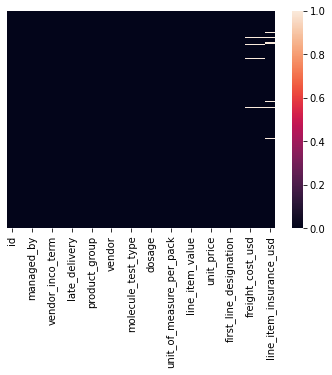

In [3]:
# Check missing value
sns.heatmap(late_shipments.isnull(),yticklabels=False)

In [22]:
late_shipments['shipment_mode'].value_counts()

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64

In [5]:
late_shipments[['shipment_mode','late']].value_counts()

shipment_mode  late
Air            No      857
Ocean          No       76
Air            Yes      49
Ocean          Yes      12
Air Charter    No        6
dtype: int64

In [82]:
late_shipments.groupby('late')['id'].count()

late
No     939
Yes     61
Name: id, dtype: int64

shipment_mode
Air            1521.778146
Air Charter    2823.500000
Ocean          6272.840909
Name: weight_kilograms, dtype: float64


<AxesSubplot:xlabel='shipment_mode', ylabel='weight_kilograms'>

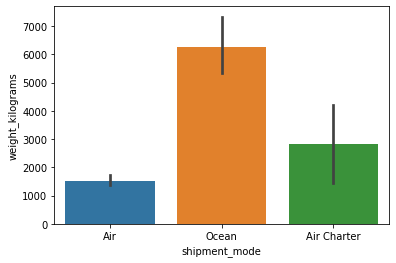

In [21]:
print(late_shipments.groupby('shipment_mode')['weight_kilograms'].agg(np.mean))
sns.barplot(x='shipment_mode',y='weight_kilograms',data=late_shipments,estimator=np.mean)
# ship by the ocean is a good way to contain a heavy stuff

- Is Shipment_mode affect late ? (Ocean Vs Air)

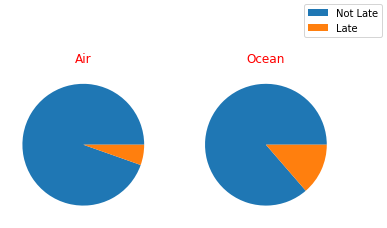

In [84]:
fig , ax = plt.subplots(1,2)
ax[0].pie(late_shipments.groupby(['shipment_mode','late'])['id'].agg(len)['Air'])
ax[0].set_title('Air',color='red')
ax[1].pie(late_shipments.groupby(['shipment_mode','late'])['id'].agg(len)['Ocean'])
ax[1].set_title('Ocean',color='red')
fig.legend(['Not Late','Late'])
# It seem proportion "Late" in "Ocean" is more than "Air" 

In [205]:
# bootsample 10000 times then calculate time of late_rate_Ocean > late_rate_Air / 10000
list_ = []
for i in range(10000):
    ship_Islate = late_shipments.sample(frac=1,replace=True).groupby(['shipment_mode','late'])['id'].agg(len)
    late_rate_Air = ship_Islate[('Air','Yes')]/ship_Islate['Air'].sum()
    late_rate_Ocean = ship_Islate[('Ocean','Yes')]/ship_Islate['Ocean'].sum()
    if late_rate_Ocean  > late_rate_Air :
        list_.append(1)
    else : list_.append(0)
sum(list_)/10000

0.9912

In [206]:
0.9912 > 0.95
# at confidence 95% : shipment by Ocean is more late than shipment by Air

True

- Is there 6% of delivery order is late ?

In [282]:
# bootsample 10000 times of late rate
late_shipments_boot_distn = []
for i in range(10000):
    late_shipments_boot_distn.append(
        late_shipments.sample(frac=1,replace=True)['late'].value_counts(normalize=True)[1]
    )
late_shipments_boot_distn[0:10]

[0.068, 0.056, 0.068, 0.065, 0.056, 0.056, 0.061, 0.067, 0.056, 0.059]

0.047 0.076


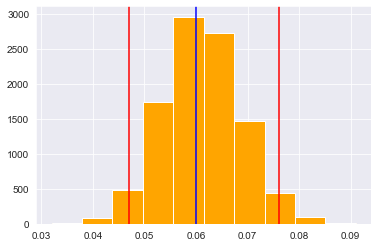

In [210]:
confidence = 0.95
lower = np.quantile(late_shipments_boot_distn, (1-confidence)/2)
upper = np.quantile(late_shipments_boot_distn, 1-(1-confidence)/2)
print(lower,upper)
sns.set_style('darkgrid')
plt.hist(late_shipments_boot_distn,color='orange')
plt.axvline(lower,color='red')
plt.axvline(upper,color='red')
plt.axvline(0.06,color='b')

In [211]:
# at confidence 95%: late_order is about 6% 

- Is weight_kilograms affected late ?

In [ ]:
# H0 : weight_kilograms_late , no_late is same
# H1 : weight_kilograms_late > weight_kilograms_No_late

In [217]:
# specify parameter to calculate t_stat

xbar_no = late_shipments.groupby('late')['weight_kilograms'].agg([np.mean,np.std,len]).loc['No'][0]
xbar_yes = late_shipments.groupby('late')['weight_kilograms'].agg([np.mean,np.std,len]).loc['Yes'][0]
s_no = late_shipments.groupby('late')['weight_kilograms'].agg([np.mean,np.std,len]).loc['No'][1]
s_yes = late_shipments.groupby('late')['weight_kilograms'].agg([np.mean,np.std,len]).loc['Yes'][1]
n_no = late_shipments.groupby('late')['weight_kilograms'].agg([np.mean,np.std,len]).loc['No'][2]
n_yes = late_shipments.groupby('late')['weight_kilograms'].agg([np.mean,np.std,len]).loc['Yes'][2]
print(xbar_yes,xbar_no)

2715.6721311475408 1897.7912673056444


In [281]:
# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes**2/n_yes + s_no**2/n_no)

# Calculate the test statistic
t_stat = numerator / denominator

print(t_stat)

2.3936661778766433


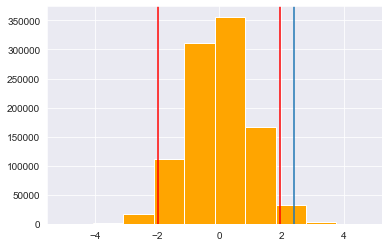

In [279]:
confidence = 0.95
normal_graph = np.random.normal(loc=0,scale=1,size=1000000)
lower = np.quantile(normal_graph, (1-confidence)/2)
upper = np.quantile(normal_graph, 1-(1-confidence)/2)
plt.hist(normal_graph,color='orange')
plt.axvline(lower,color='red')
plt.axvline(upper,color='red')
plt.axvline(t_stat)

In [280]:
1 - stat.t.cdf(t_stat,df=1000-2) < (1-confidence)/2

True

In [ ]:
# Reject H0 with Confidence 95% 
# more weight is effect more late

-----

 #### Conclusion
- Shipment by Air is low percent late than ocean so if you need to make sure delivery is not late , sent by air
- percent order late is around 5 - 7 %
- more weight stuff is trend cause late delivery

--------------------------